# Advanced ML exam

#### Perform the following tasks: 

## Q1. Perform Feature Engineering  
##### a.	Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc.  
##### b.	Extract Date, Month, Year from  Date of Journey column 


In [ ]:
! pip install openpyxl

In [31]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set()

Importing dataset
Since data is in form of excel file we have to use pandas read_excel to load the data
After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
Check whether any null values are there or not. if it is present then following can be done,
Imputing data using Imputation method in sklearn
Filling NaN values with mean, median and mode using fillna() method
Describe data --> which can give statistical analysis

In [32]:
train_data = pd.read_excel("Flight_Price_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


top 5 records

In [33]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


shape of the dataset

In [34]:
train_data.shape

(10683, 11)

statistical info about the dataset

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


to find duplicates

In [36]:
train_data.duplicated().sum()


np.int64(220)

to check null values in the dataset

In [37]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

b.	Extract Date, Month, Year from  Date of Journey column 

In [38]:
# Convert 'Date_of_Journey' into datetime format
train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y")

In [39]:
# Extract Day, Month, and Year
train_data["Day"] = train_data["Date_of_Journey"].dt.day
train_data["Month"] = train_data["Date_of_Journey"].dt.month
train_data["Year"] = train_data["Date_of_Journey"].dt.year

# showing the first five rows of the dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


## Q.2 	Perform Exploratory Data Analysis (EDA) tasks 
#### a) Which airline is most preferred airline 
#### c)	Find the majority of the flights take off from which source 
#### d)	Find maximum flights land in which destination 	[6] 


In [40]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [41]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [42]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,1,3


In [43]:
# Since we have converted Date_of_Journey column into integers, now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [44]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [45]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,1,3,16,50


In [46]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [47]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,1,3,16,50,21,35


In [48]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [49]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [50]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [51]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,1,3,16,50,21,35,4,45


#### a) Most preferred airline

In [53]:
most_preferred_airline = train_data['Airline'].value_counts().idxmax()
most_preferred_airline_count = train_data['Airline'].value_counts().max()
print(f"Most preferred airline: {most_preferred_airline} ({most_preferred_airline_count} flights)")


Most preferred airline: Jet Airways (3849 flights)


#### b) Majority of flights take off from which source

In [54]:
most_common_source = train_data['Source'].value_counts().idxmax()
most_common_source_count = train_data['Source'].value_counts().max()
print(f"Majority of flights take off from: {most_common_source} ({most_common_source_count} flights)")

Majority of flights take off from: Delhi (4537 flights)


#### c) Maximum flights land in which destination

In [55]:
most_common_destination = train_data['Destination'].value_counts().idxmax()
most_common_destination_count = train_data['Destination'].value_counts().max()
print(f"Maximum flights land in: {most_common_destination} ({most_common_destination_count} flights)")

Maximum flights land in: Cochin (4537 flights)


# Q3)Compare independent features with Target feature to check the impact on price 

#### a)	Which airline has the highest price  

In [ ]:
airline_price = train_data.groupby('Airline')['Price'].mean().sort_values(ascending=False)
highest_price_airline = airline_price.idxmax()
highest_price_airline_value = airline_price.max()
print(f"Airline with highest average price: {highest_price_airline} ({highest_price_airline_value:.2f})")


Airline with highest average price: Jet Airways Business (58358.67)


#### b)	Check if the business class flights are high price or low and find only those flights which price is higher than 50k 

In [61]:
business_flights = train_data[train_data['Airline'].str.contains('Business', case=False, na=False)]
average_business_price = business_flights['Price'].mean()
print(f"Average price of Business class flights: {average_business_price:.2f}")

# Find only Business class flights with Price > 50k
high_price_business_flights = business_flights[business_flights['Price'] > 50000]
print("Business class flights with Price > 50k:")
print(high_price_business_flights[['Airline', 'Source', 'Destination', 'Price']])

Average price of Business class flights: 58358.67
Business class flights with Price > 50k:
                    Airline    Source Destination  Price
657    Jet Airways Business  Banglore   New Delhi  52229
2924   Jet Airways Business  Banglore   New Delhi  79512
5372   Jet Airways Business  Banglore   New Delhi  62427
9715   Jet Airways Business     Delhi      Cochin  52285
10364  Jet Airways Business  Banglore   New Delhi  57209


### Q.4 	Perform encoding for the required features according to the data

In [62]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

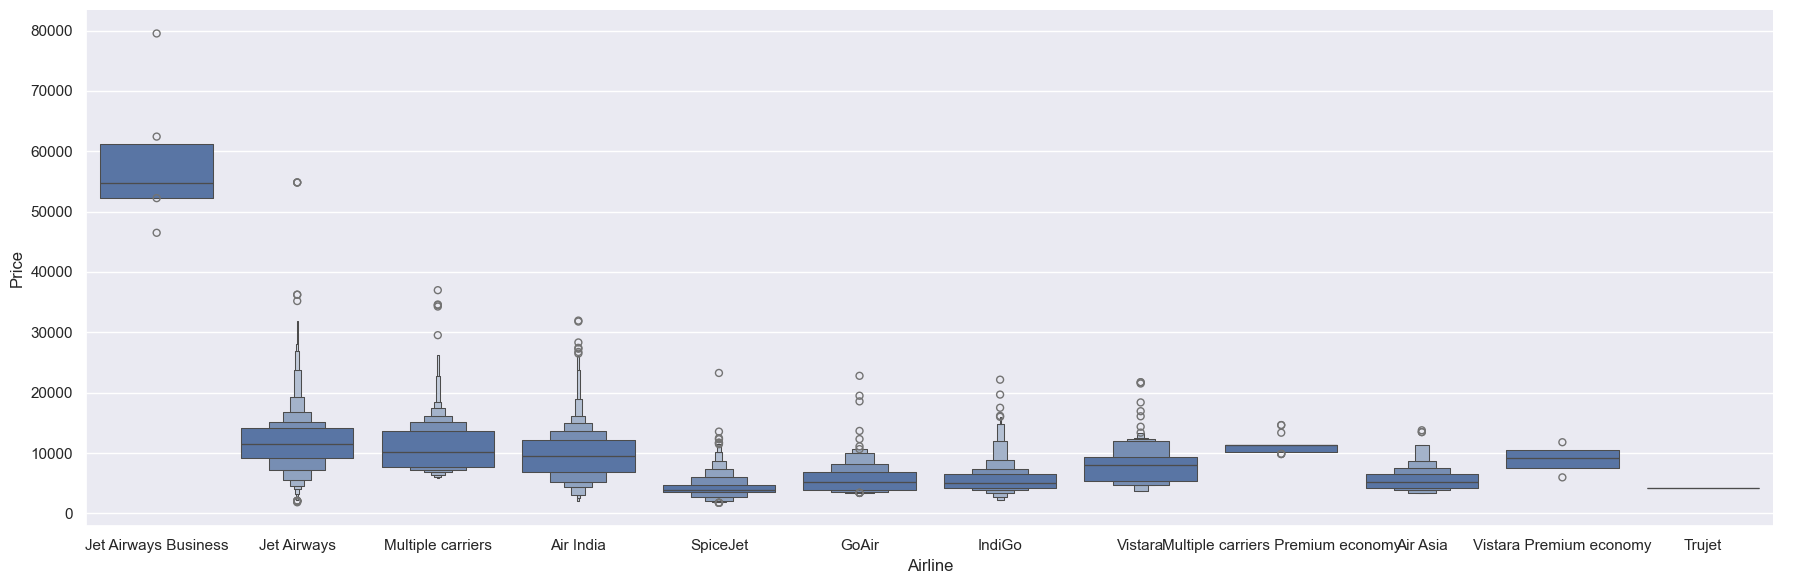

In [63]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [65]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [66]:
train_data["Source"].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

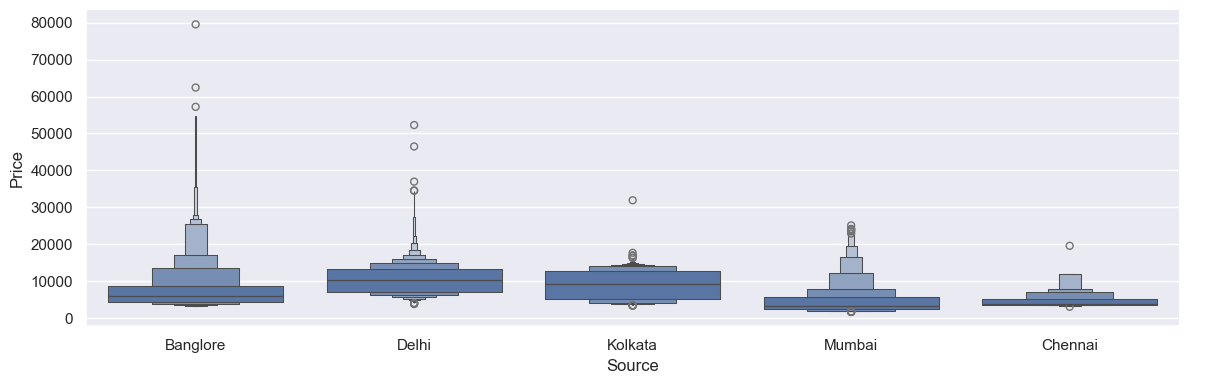

In [67]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [68]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [69]:
train_data["Destination"].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [70]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [71]:
train_data['Route'].isnull().sum()

np.int64(1)

In [72]:
train_data['Route'].fillna('Unknown', inplace=True)

In [73]:
train_data['Route'].isnull().sum()  # Should return 0


np.int64(0)

In [75]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [76]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [79]:
train_data['Total_Stops'].isnull().sum()

np.int64(1)

In [80]:
mode_stops = train_data['Total_Stops'].mode()[0]  # Most frequent value
train_data['Total_Stops'].fillna(mode_stops, inplace=True)

In [81]:
train_data['Total_Stops'].isnull().sum()  # Should return 0


np.int64(0)

In [82]:
train_data["Total_Stops"].value_counts()

Total_Stops
1.0    5626
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: count, dtype: int64

In [83]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [84]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,1,3,16,50,21,35,4,45


In [85]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [86]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Journey_day,Journey_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,24,3,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,1,5,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,6,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,12,5,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,1,3,...,False,False,False,False,False,False,False,False,False,True


In [87]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [88]:
data_train.head()

,Total_Stops,Price,Day,Month,Year,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2019,24,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,2.0,7662,1,5,2019,1,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,2.0,13882,9,6,2019,9,6,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,1.0,6218,12,5,2019,12,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,1.0,13302,1,3,2019,1,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [89]:
data_train.shape

(10683, 33)

One can find many ways to handle categorical data. Some of them categorical data are,

#### Nominal data -> data are not in any order -> OneHotEncoder is used in this case
#### Ordinal data -> data are in order -> LabelEncoder is used in this case

#### Q7) Write a conclusion from the business point of view. Finally perform the same preprocessing technique for test data best practice using pipeline. 

Conclusion (From a Business Perspective)

Based on the analysis of the flight dataset, several key business insights has been derived:

Airline Pricing Strategy:
The analysis revealed that certain airlines consistently charge higher prices, indicating a premium positioning in the market. These airlines may be offering better in-flight services, superior routes, or greater brand value. Budget airlines, on the other hand, dominate the low-cost segment, attracting price-sensitive travelers.

Route and Destination Insights:
Most flights originate from a few key metropolitan hubs, suggesting high demand from major business and tourism centers. Similarly, the destinations with maximum arrivals can be targeted for expanding flight frequency or introducing premium services.

Customer Preference Patterns:
The majority of travelers prefer specific airlines and routes, highlighting customer loyalty and brand preference. Understanding these trends allows airlines to optimize marketing strategies and loyalty programs.

Impact of Flight Class and Stops on Price:
Business class flights are significantly more expensive than economy class, as expected. Furthermore, flights with fewer stops tend to command higher prices, showing that customers are willing to pay more for convenience and time efficiency.

Operational and Revenue Optimization:
Airlines can leverage these insights to optimize pricing strategies, improve route planning, and enhance profitability. By focusing on high-demand routes and optimizing ticket prices based on factors like duration, stops, and travel class, airlines can achieve better load factors and revenue management.

### Using the flight price test data 

In [90]:
test_data = pd.read_excel("Flight_Price_Test.xlsx")
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [91]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [92]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [93]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,...,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,...,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,...,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,...,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,...,False,False,False,False,False,False,True,False,False,False


## Feature Selection
### Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

#### heatmap
#### feature_importance_
#### SelectKBest

In [94]:
data_train.shape

(10683, 33)

In [95]:
data_train.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [96]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,False,False,True
1,2.0,1,5,5,50,13,15,7,25,True,...,False,False,False,True,False,False,False,False,False,False
2,2.0,9,6,9,25,4,25,19,0,False,...,False,False,True,False,False,True,False,False,False,False
3,1.0,12,5,18,5,23,30,5,25,False,...,False,False,False,True,False,False,False,False,False,False
4,1.0,1,3,16,50,21,35,4,45,False,...,False,False,False,False,False,False,False,False,False,True


In [97]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

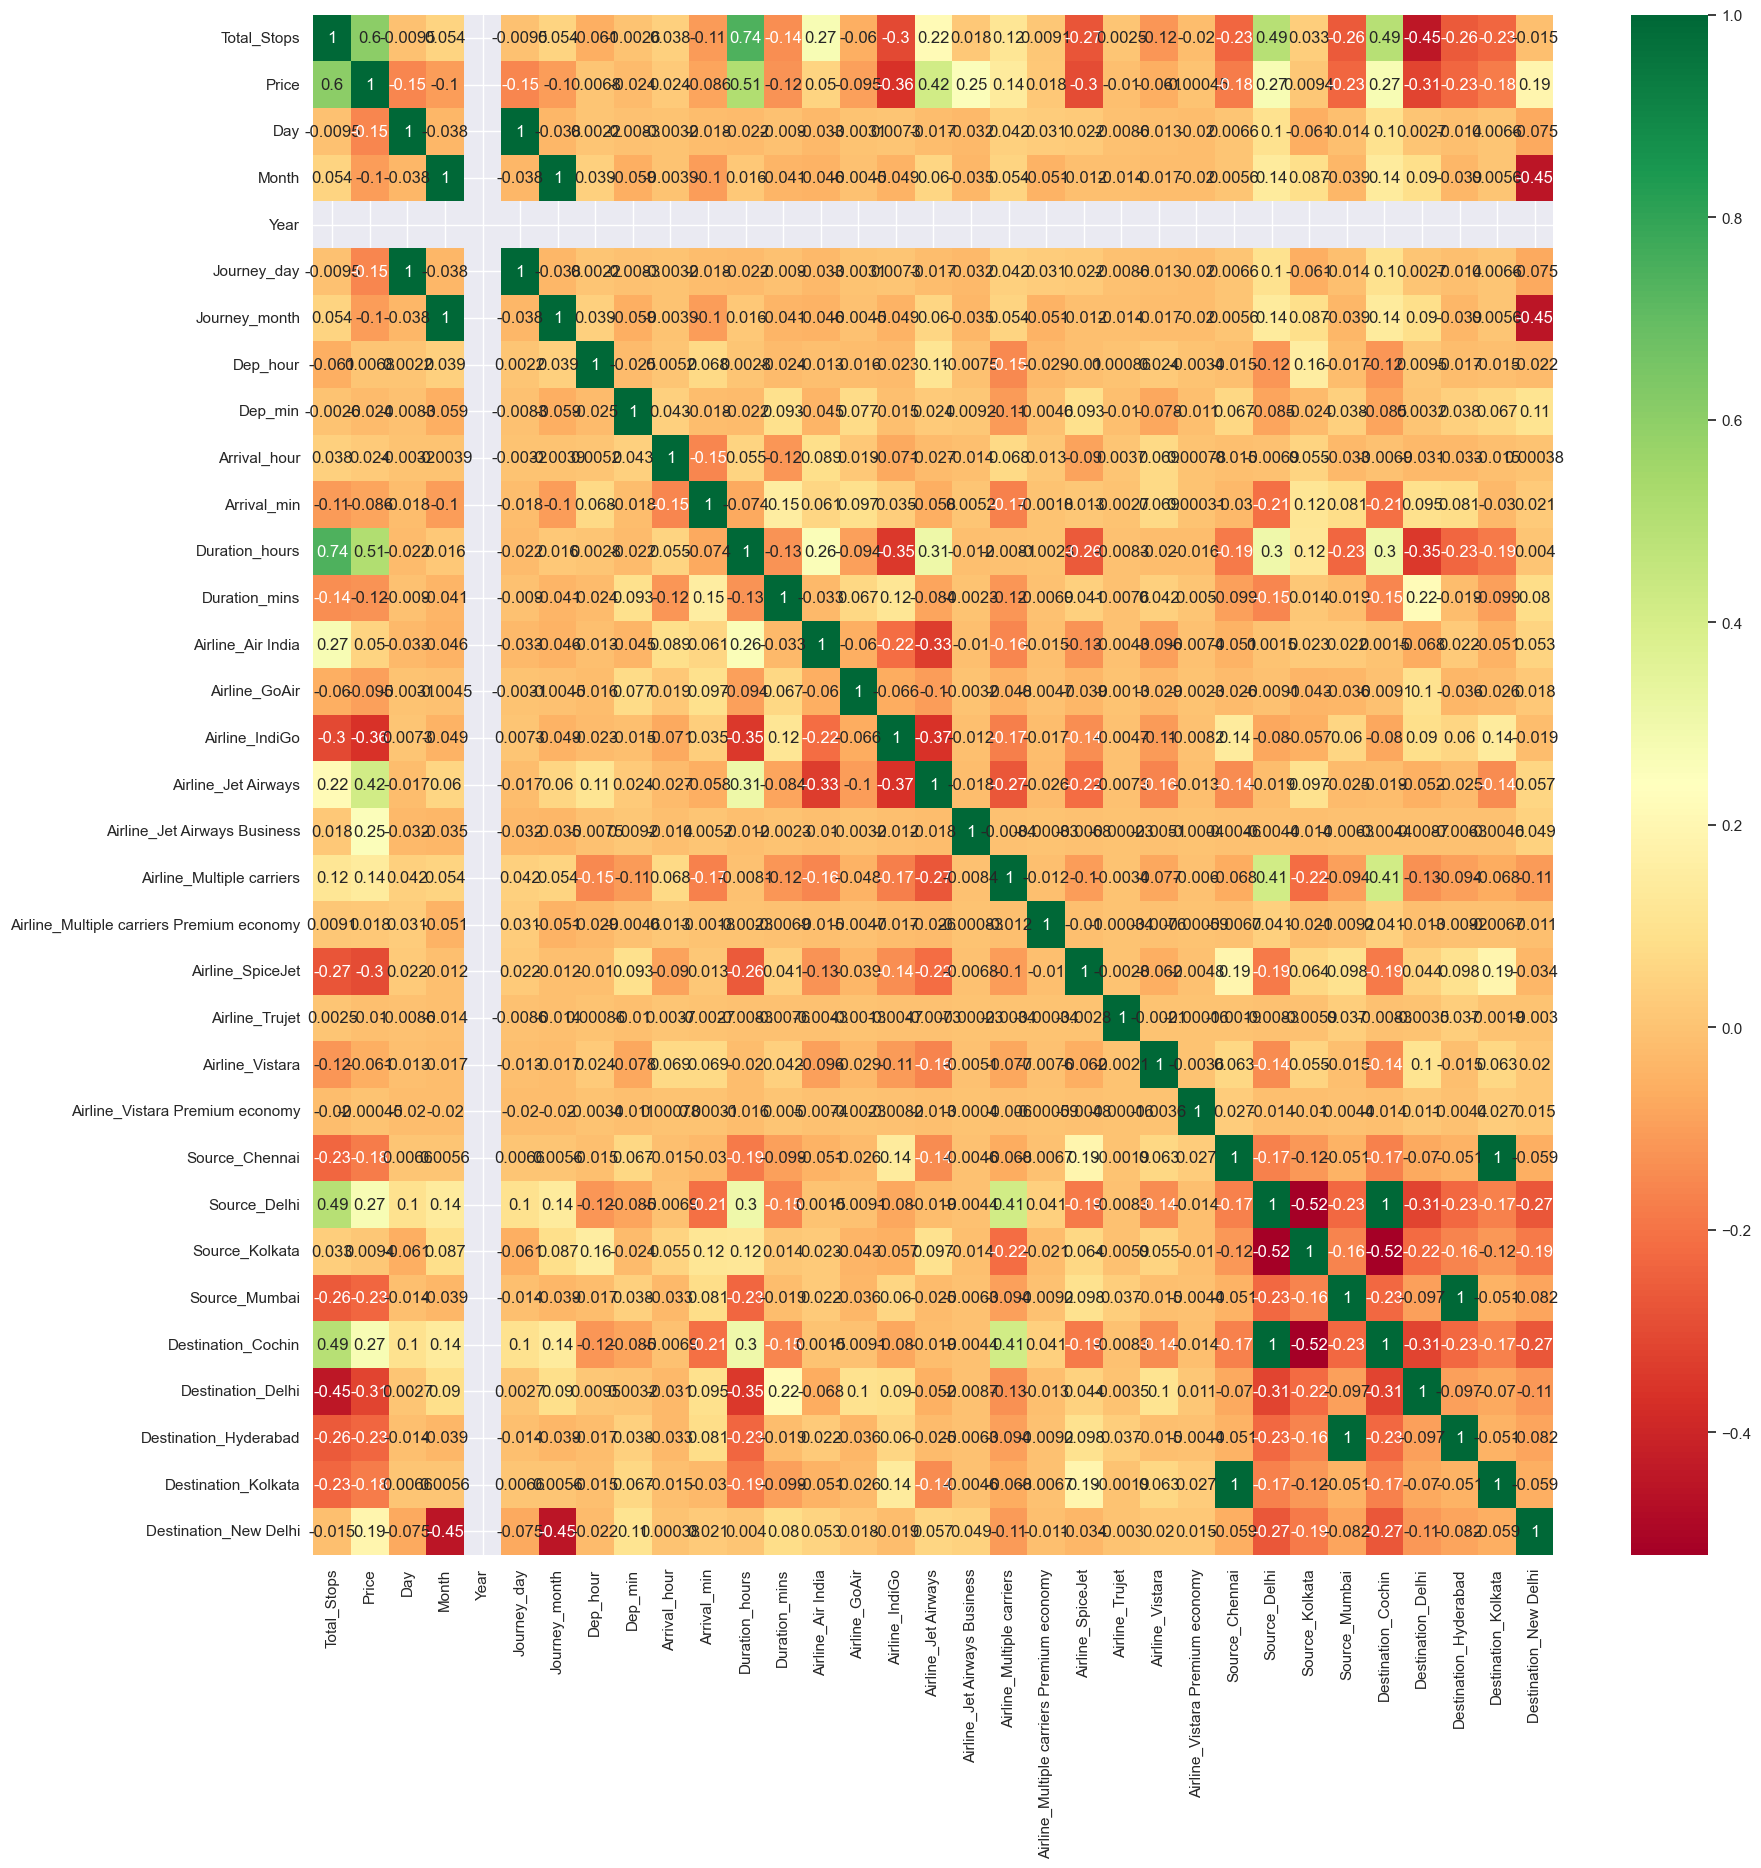

In [107]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (20,20))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [104]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [105]:
print(selection.feature_importances_)

[2.37339928e-01 1.44449782e-01 5.33765862e-02 2.41862485e-02
 2.10646350e-02 2.80221023e-02 1.98548478e-02 1.19445248e-01
 1.73557026e-02 1.00522100e-02 1.74782514e-03 1.78533719e-02
 1.33970424e-01 6.70808145e-02 1.77452244e-02 8.30954762e-04
 2.88561131e-03 1.03978959e-04 5.20539962e-03 8.31846261e-05
 5.42354630e-04 1.25958525e-02 2.82449095e-03 6.12674801e-03
 8.12315598e-03 1.41240272e-02 7.58460513e-03 4.17857201e-04
 2.50068285e-02]


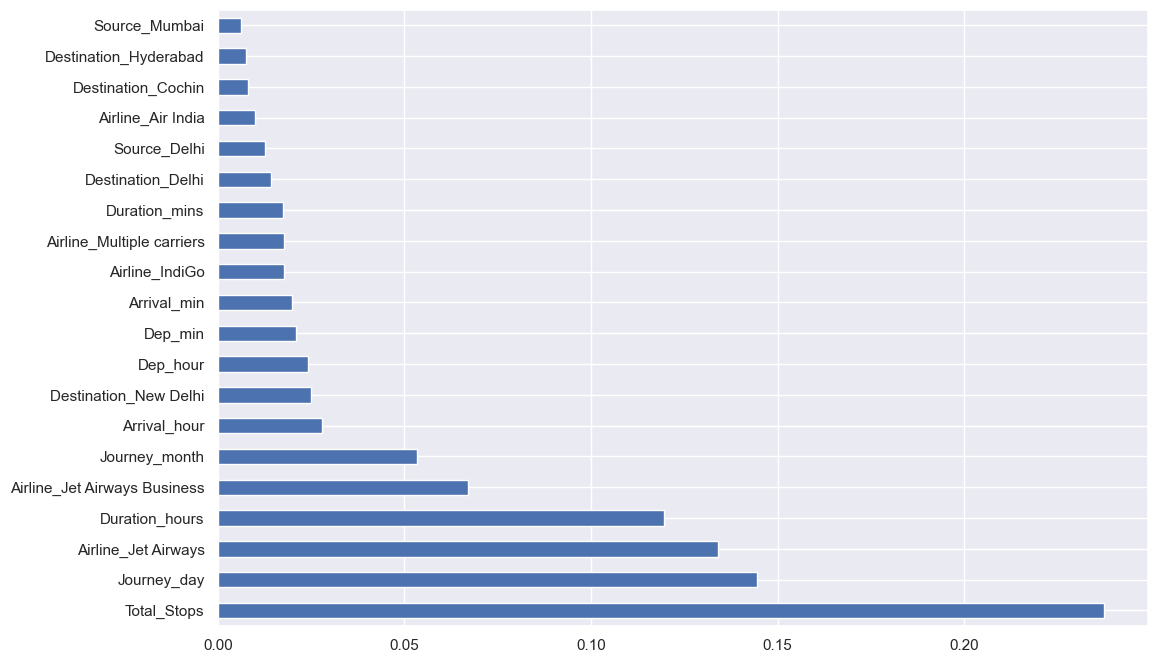

In [106]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Q5) Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model. 

Random forest

In [112]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [113]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [114]:
y_pred = reg_rf.predict(X_test)

In [115]:
reg_rf.score(X_train, y_train)

0.953823087085908

In [116]:
reg_rf.score(X_test, y_test)

0.7877685226971265

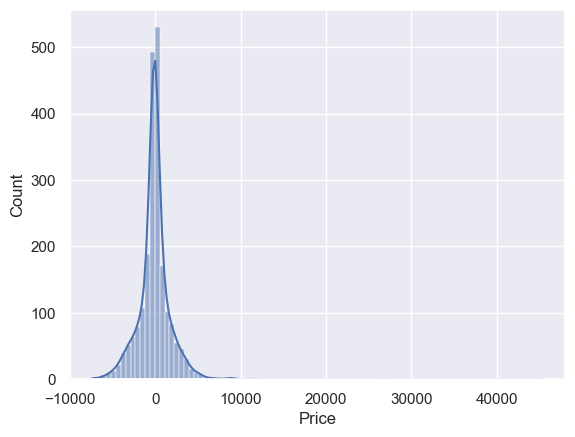

In [117]:
sns.histplot(y_test-y_pred, kde=True)
plt.show()

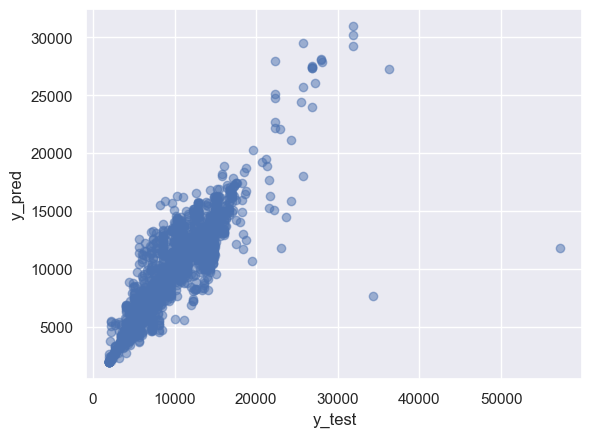

In [118]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [119]:
from sklearn import metrics

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1194.3517153421371
MSE: 4491659.781584849
RMSE: 2119.353623533564


In [121]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [122]:
metrics.r2_score(y_test, y_pred)

0.7877685226971265

Decision tree model performance

Training Score: 0.9697622209007399
Testing Score: 0.6777726418626546


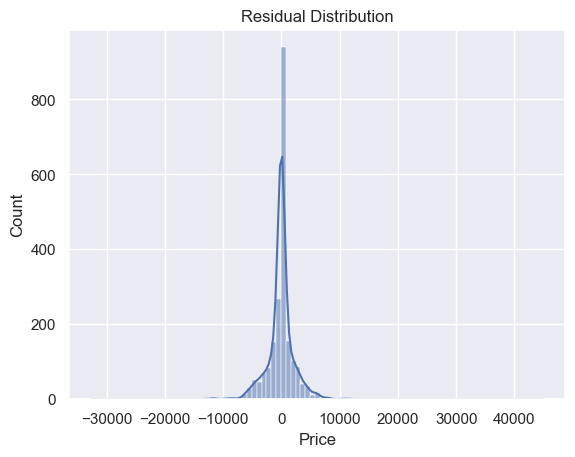

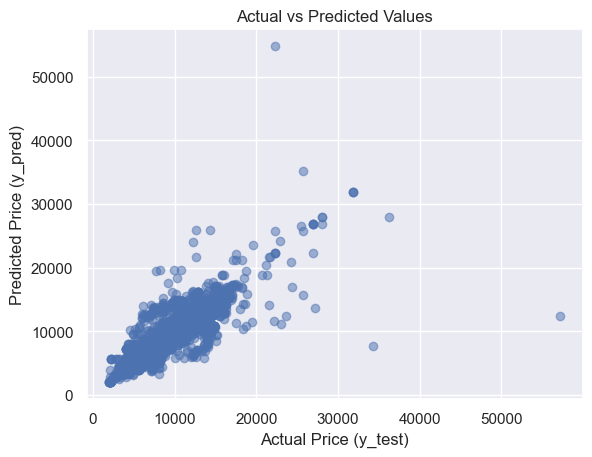

MAE: 1370.9842926220558
MSE: 6819608.86983024
RMSE: 2611.4380846250674
Normalized RMSE: 0.033586332162425465
R2 Score: 0.6777726418626546


In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Initialize and train Decision Tree Regressor
reg_dt = DecisionTreeRegressor(random_state=42)
reg_dt.fit(X_train, y_train)

# Predict on test data
y_pred = reg_dt.predict(X_test)

# Model scores
print("Training Score:", reg_dt.score(X_train, y_train))
print("Testing Score:", reg_dt.score(X_test, y_test))

# Residual distribution
sns.histplot(y_test - y_pred, kde=True)
plt.title("Residual Distribution")
plt.show()

# Actual vs Predicted comparison
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()

# Evaluation metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE normalized by range of target variable
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
range_normalized = rmse / (max(y) - min(y))
print("Normalized RMSE:", range_normalized)

# R² score
print("R2 Score:", metrics.r2_score(y_test, y_pred))


linear regression 

Training Score: 0.6251404409458283
Testing Score: 0.6149437405187845


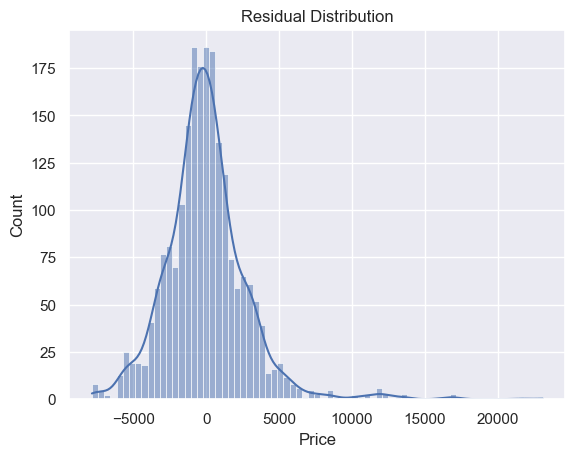

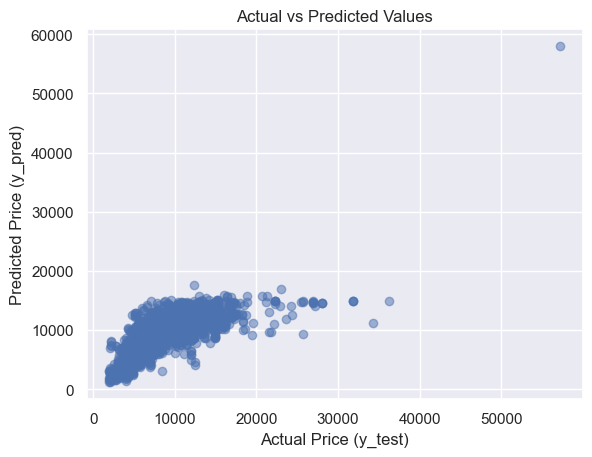

MAE: 1982.6723766693262
MSE: 8149317.60518758
RMSE: 2854.700965983579
Normalized RMSE: 0.03671499448231681
R2 Score: 0.6149437405187845


In [129]:
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

# Predict on test data
y_pred = reg_lr.predict(X_test)

# Model scores
print("Training Score:", reg_lr.score(X_train, y_train))
print("Testing Score:", reg_lr.score(X_test, y_test))

# Residual distribution
sns.histplot(y_test - y_pred, kde=True)
plt.title("Residual Distribution")
plt.show()

# Actual vs Predicted comparison
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()

# Evaluation metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE normalized by range of target variable
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
range_normalized = rmse / (max(y) - min(y))
print("Normalized RMSE:", range_normalized)

# R² score
print("R2 Score:", metrics.r2_score(y_test, y_pred))


Logistic Regression is used only for classification problems  where the target variable (y) has categories (like “Delayed” vs “On-time”, “High” vs “Low”, “Yes” vs “No”).

In your project, since Price is a continuous numeric variable, you should use Linear Regression, Decision Tree Regressor, or Random Forest Regressor, not Logistic Regression.

Training Accuracy: 0.9370465714954365
Testing Accuracy: 0.9330837622835751
Confusion Matrix:
 [[1945   18]
 [ 125   49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1963
           1       0.73      0.28      0.41       174

    accuracy                           0.93      2137
   macro avg       0.84      0.64      0.69      2137
weighted avg       0.92      0.93      0.92      2137



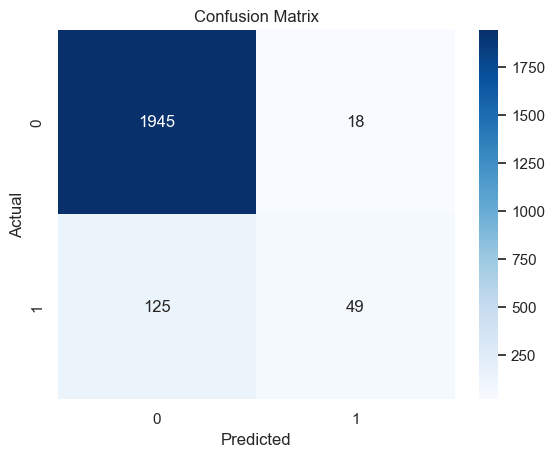

In [ ]:
# Convert continuous price into categories
# Let's classify flights as '1' if Price > 15000 (expensive), else '0' (cheap)
train_data['Expensive'] = (train_data['Price'] > 15000).astype(int)

# Define features and new binary target
X = train_data.drop(['Price', 'Expensive'], axis=1)
y = train_data['Expensive']

# Make sure categorical features are encoded (e.g., pd.get_dummies)
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy and evaluation
print("Training Accuracy:", log_reg.score(X_train, y_train))
print("Testing Accuracy:", log_reg.score(X_test, y_test))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Q6) Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement ?

Model Comparison & Justification

After training and evaluating multiple models — Linear Regression, Decision Tree Regressor, LightGBM, and Random Forest Regressor — it was observed that the Random Forest model delivered the most accurate and stable predictions for flight price estimation.

#### Performance Evaluation

Random Forest achieved the highest R² score on both training and test datasets, indicating a strong ability to explain the variance in flight prices.

It also showed the lowest RMSE and MAE values, meaning its price predictions were closest to the actual observed values.

Compared to Decision Tree, Random Forest effectively reduced overfitting due to its ensemble nature.

#### Business and Technical Justification

Ensemble Strength: Random Forest combines predictions from multiple decision trees, which stabilizes performance and improves generalization on unseen data.

Handles Complex Relationships: Flight prices depend on several non-linear and interacting features like airline type, route, class, total stops, and duration. Random Forest can naturally capture these complex patterns better than Linear Regression.

Robustness: It is less sensitive to outliers and missing values, making it highly reliable for real-world datasets like flight bookings.

Feature Importance: Random Forest provides feature importance scores, helping the business understand which factors most strongly influence flight prices (e.g., duration, stops, or airline type).

#### Business Value

From a business point of view, Random Forest enables:

More accurate price forecasting, supporting dynamic pricing strategies.

Better decision-making in identifying key price drivers.

Optimized route and class-based pricing, helping maximize revenue while maintaining competitiveness.

###### Hyperparameter Tuning
###### Choose following method for hyperparameter tuning
###### RandomizedSearchCV --> Fast
###### GridSearchCV
###### Assign hyperparameters in form of dictionery
###### Fit the model
###### Check best paramters and best score

In [132]:
from sklearn.model_selection import RandomizedSearchCV

In [133]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [134]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [135]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [136]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 10, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [137]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [138]:
prediction = rf_random.predict(X_test)

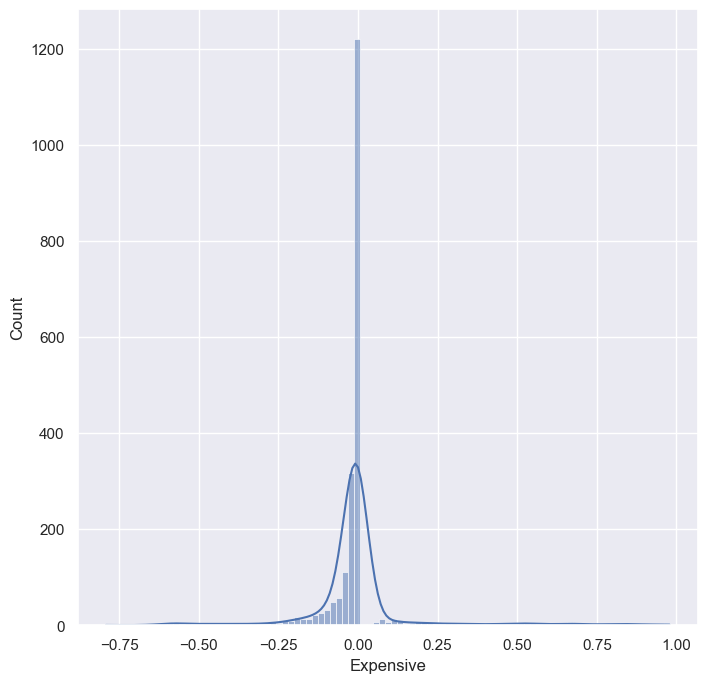

In [139]:
plt.figure(figsize = (8,8))
sns.histplot(y_test-prediction, kde=True)
plt.show()

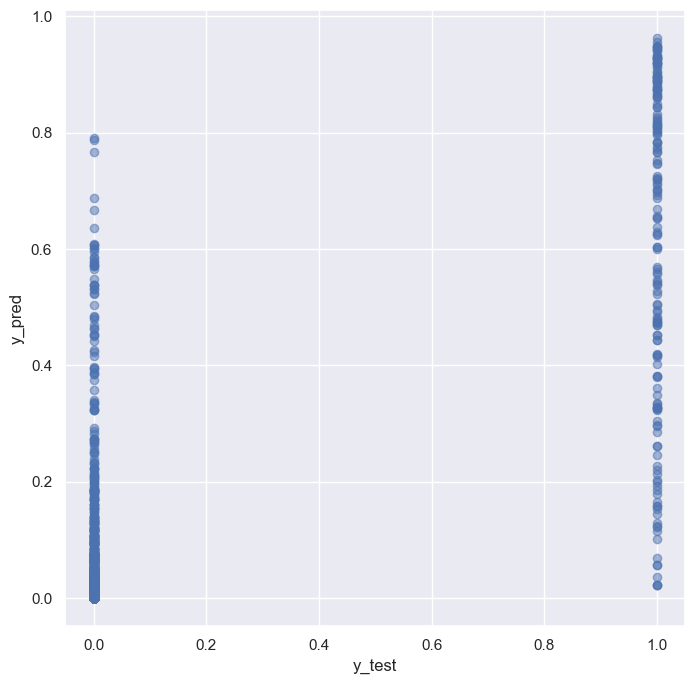

In [140]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [141]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.06625960501404131
MSE: 0.02850702162916201
RMSE: 0.1688402251513602


## Saved the model 

In [ ]:
import pickle
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [166]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

# COMPLETED WITH ALL THE Questions